In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_json("./data/test.json", lines=True)
df_data.head()

,id,user_id,item_id,join
0,0,0,0,0
1,1,0,1,0
2,2,0,1,0
3,3,0,0,0
4,4,0,1,0


# Descriptions

In [5]:
print(f"id counts: {df_data.id.nunique()}")
print(f"user_id counts: {df_data.user_id.nunique()}")
print(f"item_id counts: {df_data.item_id.nunique()}")


id counts: 95993
user_id counts: 70
item_id counts: 1954


In [6]:
def get_count(value):
    res = dict()
    res['apply_cnt'] = value['id'].count()
    res['join_cnt'] = value['join'].sum()
    return pd.Series(res, index=res.keys())

df_grouped = df_data.groupby(['user_id', 'item_id']).apply(get_count)
df_grouped.reset_index(inplace=True)

In [7]:
df_grouped.loc[df_grouped['user_id']==69]

,user_id,item_id,apply_cnt,join_cnt
28288,69,11,1,0
28289,69,16,4,0
28290,69,19,1,0
28291,69,34,2,0
28292,69,41,3,0
...,...,...,...,...
28497,69,1930,1,0
28498,69,1931,3,0
28499,69,1932,1,0
28500,69,1935,2,0


# Neighborhood Model

user가 주어진 item 중에서 선택한 item의 집합을 기준으로 user들의 segement를 나눕니다

In [29]:
df_nm = df_grouped.loc[df_grouped['join_cnt']>=1].copy()
df_nm


,user_id,item_id,apply_cnt,join_cnt
2,0,2,2,1
3,0,3,8,1
4,0,7,5,1
7,0,11,8,6
9,0,13,2,1
...,...,...,...,...
28461,69,1828,5,2
28465,69,1839,1,1
28469,69,1855,3,1
28470,69,1856,3,2


In [30]:
df_nm = df_nm.groupby(['user_id']).apply(lambda x: list(x['item_id']))
df_nm.columns = ['set']
df_nm

user_id
0     [2, 3, 7, 11, 13, 16, 20, 34, 35, 37, 41, 43, ...
3     [7, 14, 16, 34, 37, 41, 53, 59, 66, 74, 77, 97...
4     [4, 6, 8, 9, 13, 14, 16, 22, 24, 25, 27, 30, 3...
5     [13, 14, 20, 25, 28, 37, 38, 39, 46, 48, 49, 5...
6     [4, 5, 11, 14, 24, 25, 28, 31, 34, 35, 37, 39,...
                            ...                        
65                            [229, 537, 622, 830, 917]
66    [35, 36, 37, 53, 60, 68, 77, 78, 103, 175, 188...
67    [78, 160, 188, 241, 432, 542, 655, 691, 697, 7...
68    [25, 74, 109, 125, 160, 188, 198, 206, 275, 28...
69    [247, 273, 315, 316, 340, 341, 469, 784, 817, ...
Length: 67, dtype: object

In [40]:
def get_intersection(list_1:list, list_2:list):
    return len(set(list_1).intersection(list_2))/len(set(list_1))

dict_data = dict()
list_id = df_nm.index
for idx in list_id:
    res_dict = dict()
    for idx_2 in list_id:
        res_dict[idx_2] = get_intersection(df_nm[idx], df_nm[idx_2])
    dict_data[idx] = res_dict

In [42]:
df_res = pd.DataFrame(dict_data)

In [48]:
df_res[3].sort_values(ascending=False)

3     1.000000
47    0.634615
64    0.557692
6     0.461538
34    0.442308
        ...   
61    0.000000
63    0.000000
62    0.000000
14    0.000000
19    0.000000
Name: 3, Length: 67, dtype: float64

<AxesSubplot: >

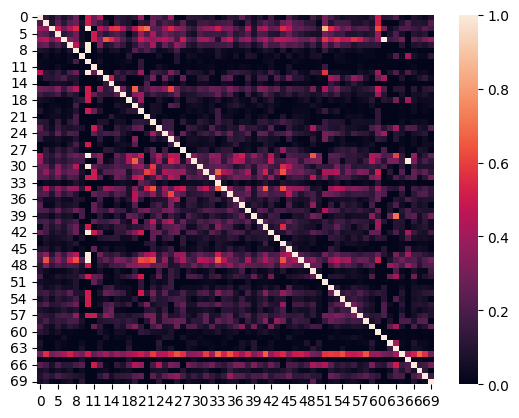

In [50]:
sns.heatmap(df_res)